.
# Interactive Visualization

There are few actions less efficient in data exploration than re-running the same cell over and over again, each time slightly changing the input parameters. Further, when statically displaying data, there is no chance for any reader to look into the data in more detail, except by adding their own code. In this lecture, we will look at **interactive visualization**, that allows to display content with interactive controls to change inputs without needing to rewrite or rerun code.

In [1]:
import sys
sys.path.append("..")
from utils import count_down

# Interactive Visualization

# Jupyter-Widgets

Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc. Widgets can be used to build interactive data exploration and interactive GUIs, allowing us to turn Jupyter Notebooks from static documents into interactive dashboards, perfect for exploring and visualizing data.

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

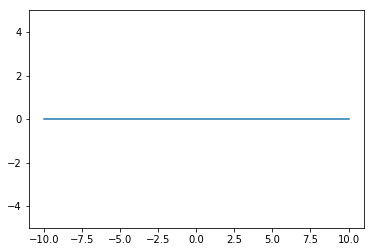

In [3]:
def f(slope, intercept):
    fig, ax = plt.subplots()
    x = np.linspace(-10, 10, num=1000)
    ax.plot(x, slope * x + intercept)
    ax.set_ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, slope=(-2.0, 2.0), intercept=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


Widgets have their own display `repr` which allows them to be displayed using IPython’s display framework. Constructing and returning an `IntSlider` automatically displays the widget.

In [4]:
from IPython.display import display
widgets.IntSlider()

IntSlider(value=0)

Widgets can also be displayed by calling `display`. If you display the same widget twice, their front-end-representation will stay in sync:

In [5]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [6]:
display(w)

IntSlider(value=0)

Note that we can get its `value`, however if you simply return it its not interactive!

In [7]:
w.value

0

.
## Linking two similar widgets

If you need to display the same value two different ways, you’ll have to use two different widgets. To synchronize the values of the two widgets, you can use the `jslink` function to link two properties together:

In [8]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

By binding widgets, we can also show our value from before interactively!

In [9]:
display(w)

IntSlider(value=0)

In [10]:
w2 = widgets.Label()
widgets.jslink((w, 'value'), (w2, 'value'))
display(w2)

Label(value='')

## The `interact`-function

At the most basic level, `interact` autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use interact, you need to define a function that you want to explore.

In [11]:
def f(x):
    return x ** 2

When you pass this function as the first argument to `interact` along with an integer keyword argument (`x=10`), a slider is generated and bound to the function parameter. When this slider is moved, the function is called (over and over again) with the current value of x.

In [12]:
interact(f, x=10)

100

<function __main__.f(x)>

If you pass `True` or `False`, `interact` will generate a checkbox:

In [13]:
interact(f, x=True)

1

<function __main__.f(x)>

If you pass a string, `interact` will generate a text area.

In [14]:
interact(lambda x: x, x="Hi there!")

'Hi there!'

<function __main__.<lambda>(x)>

If you pass lists or dictionaries (*not tuples!*), it will make a dropdown menu:

In [15]:
interact(lambda x: x, x={"one": 1, "two": 2})

1

<function __main__.<lambda>(x)>

`interact` can also be used as a decorator. This allows you to define a function and interact with it in a single shot. As this example shows, `interact` also works with functions that have multiple arguments. Note also that passing a `float` will produce a different kind of slider: The `FloatSlider`:

In [16]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

(True, 1.0)

In [17]:
# fixed values will not lead to a slider:
@interact(x=True, y=fixed(1.0))
def g(x, y):
    return (x, y)

(True, 1.0)

### Abbreviations

So far, we passed `ints`, `floats`, `booleans`, `strings`, `lists` and `dicts`. These are in fact only **abbreviations** for the respective widgets.

In [18]:
interact(lambda x: x, x=widgets.IntSlider(min=-10, max=30, step=1, value=10))

10

<function __main__.<lambda>(x)>

For IntSliders and FloatSliders, you can also pass a tuple of `(min, max)`, `(min, max, step)`:

In [19]:
interact(lambda x: x ** 2.1, x=(5.99, 9.01, 0.01))

68.61385448828317

<function __main__.<lambda>(x)>

For both integer and float-valued sliders, you can pick the initial value of the widget by passing a default keyword argument to the underlying Python function. Here we set the initial value of a float slider to `5.5`

In [20]:
@interact(x=(0.0, 20.0, 0.5))
def h(x=5.5):
    return x

5.5

Using the explicit variant gives you more control. For example, you can turn off continuous updates if you have a slow function:

In [21]:
def slow_function(i):
    print(int(i),list(x for x in range(int(i)) if
                str(x)==str(x)[::-1] and
                str(x**2)==str(x**2)[::-1]))
    return

interact(slow_function, 
         i= widgets.FloatSlider(
             value=2e5,
             min=1e5,
             max=1e7,
             step=1e5,
             description='Test:',
             disabled=False,
             continuous_update=False,    #continuous_update=False will make it listen only to MouseRelease-Events
             orientation='horizontal',
             readout=True,
             readout_format='.1f')
        );

200000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111]


For very slow functions, there's also interact_manual, that adds a button:

In [22]:
interact_manual(slow_function,i=widgets.FloatSlider(min=1e5, max=1e7, step=1e5));

interactive(children=(FloatSlider(value=100000.0, description='i', max=10000000.0, min=100000.0, step=100000.0…

## Other widgets

There are in fact quite many Jupyter Widgets!

In [23]:
from IPython.display import IFrame

out = widgets.Output(layout={'border': '2px solid black'})
with out:
    display(IFrame(
        "https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html",
        width="100%",
        height=500,
    ))
out

Output(layout=Layout(border='2px solid black'))

In [24]:
datepicker = widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

accordion = widgets.Accordion(children=[widgets.IntSlider(), widgets.Text()])
accordion.set_title(0, 'Slider')
accordion.set_title(1, 'Text')

tab_nest = widgets.Tab()
tab_nest.children = [accordion, datepicker]
tab_nest.set_title(0, 'An accordion')
tab_nest.set_title(1, 'A date-picker')
tab_nest

## Exercise

Let the following function **interact** with a **SelectMultiple**-widget!

In [25]:
known_fruits = ['Apples', 'Oranges', 'Pears', 'Grapes', 'Melons']
def some_func(fruits):
    print('Today I will eat '+' and '.join(fruits)+'.')

In [26]:
count_down(3)

You have 3 minutes time for the exercise.


In [27]:
interact(some_func, fruits=widgets.SelectMultiple(options=known_fruits));

Today I will eat .


## `interactive`

When you want to reuse the widgets you're working with, you use `interactive` rather than `interact`:

In [28]:
from IPython.display import display
def f(a, b):
    display(a + b)
    return a+b

In [29]:
w = interactive(f, a=10, b=20)
type(w)

ipywidgets.widgets.interaction.interactive

In [30]:
display(w)

30

In [31]:
w.children

(IntSlider(value=10, description='a', max=30, min=-10),
 IntSlider(value=20, description='b', max=60, min=-20),
 Output())

In [32]:
w.kwargs, w.result

({'a': 10, 'b': 20}, 30)

## Example

In [33]:
import seaborn as sns
import pandas as pd
titanic = pd.read_csv('titanic.csv')
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


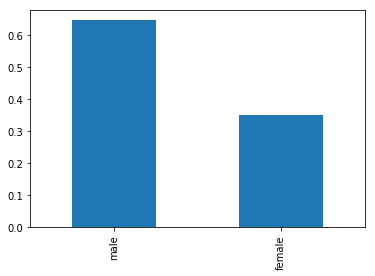

In [34]:
(titanic['Sex'].value_counts()/titanic['Sex'].count()).plot(kind='bar');

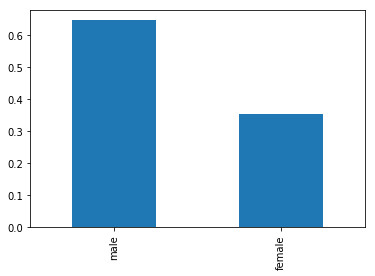

In [35]:
def plot_sex_distribution(dataset, agerange):
    dataset = dataset[dataset['Age'].between(agerange[0], agerange[1])]
    (dataset['Sex'].value_counts()/dataset['Sex'].count()).plot(kind='bar')
    
interactive(plot_sex_distribution, dataset=fixed(titanic), agerange=widgets.FloatRangeSlider(min=titanic['Age'].min(), max=titanic['Age'].max()))

You can use interactivity in all steps of your data analysis process!

In [36]:
@interact
def describe(column=list(titanic.columns)):
    print(titanic[column].describe())

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64


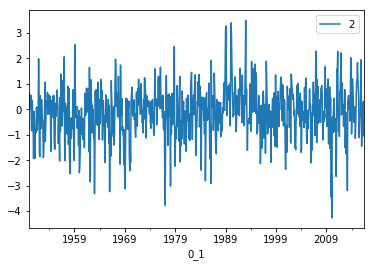

In [37]:
ts = pd.read_fwf('../week08-Analyzing_Data_with_Pandas/data/ao_monthly.txt', header=None, index_col=0,
                parse_dates=[[0, 1]], infer_datetime_format=True)

ts.plot();

There are 798 values between 1950-01-01 and 2016-06-01.


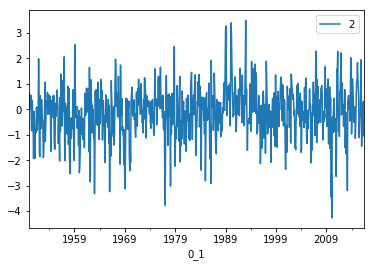

In [38]:
def plot_between_dates(start_date, end_date):
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    plot_df = ts.loc[(ts.index >= start_date) & (ts.index <= end_date)].copy()
    print(f'There are {len(plot_df)} values between {start_date.date()} and {end_date.date()}.')
    plot_df.plot()
    
interact(plot_between_dates,
         start_date=widgets.DatePicker(value=ts.index.min()),
         end_date=widgets.DatePicker(value=ts.index.max()));

## Displaying Text and more: the Output-Widget

Next to all the interactive-Input-Widgets, there is also the **Output-Widget**, which creates a container for output in the cell where it is used. You can create it once, add output to it with a bunch of methods and display it in every cell you need it:

In [39]:
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border='1px solid black'))

You can use a context-manager to print text to this output:

In [40]:
with out:
    for i in range(5):
        print(i, 'Hello world!')

0 Hello world!
1 Hello world!
2 Hello world!
3 Hello world!
4 Hello world!


In [41]:
out

Output(layout=Layout(border='1px solid black'))

In [42]:
with out:
    print('One more thing!')
    display(IFrame(
    "https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html",
    width="100%",
    height=400,
))

One more thing!


In [43]:
out

Output(layout=Layout(border='1px solid black'))

In [44]:
out.clear_output()

Further, you can use decorators or directly invoke the `append_stdout`-method:

In [45]:
@out.capture()
def function_with_captured_output():
    print('This goes into the output widget')
    raise Exception('As does this')

function_with_captured_output()

This goes into the output widget


Exception: As does this

In [46]:
out.append_stdout('\nI do not need to use context-managers or decorators!')

You can combine all Input-Widgets with the output-widget:

In [47]:
a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.IntSlider(description='c')
def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out2 = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out2])

0*0*0=0


### Displaying Markdown and HTML

Using the `HTML` widget, you can display HTML and through the `markdown`-package also Markdown-Text:

In [48]:
import markdown 
from ipywidgets import HTML

html = markdown.markdown("""### Markdown""")
html += '\n<i>HTML</i>'
print(html)

ModuleNotFoundError: No module named 'markdown'

In [49]:
HTML(html) 

NameError: name 'HTML' is not defined

### Displaying Images

In [50]:
import os
from IPython.display import Image

dir = '../week12-Statistical-Modeling/figures'

@interact
def show_images(file=os.listdir(dir)):
    print(os.path.join(dir, file))

../week12-Statistical-Modeling/figures/nht.png


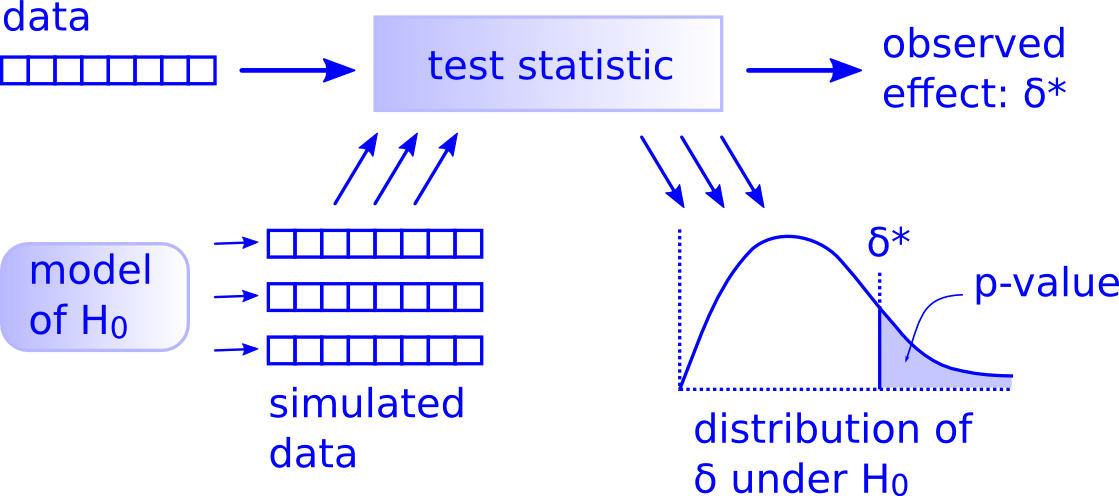

In [51]:
import os
from IPython.display import Image

dir = '../week12-Statistical-Modeling/figures'

@interact
def show_images(file=os.listdir(dir)):
    display(Image(os.path.join(dir, file)))

## Events

You can bind callback-functions to interactive Elements such as buttons to add behaviour upon interaction with them:

In [52]:
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Note however, that to actually see something you have to use an interactive output!

In [53]:
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border='1px solid black'))

In [54]:
def on_button_clicked_2(b):
    with out:
        print("Button clicked (2)")

button.on_click(on_button_clicked, remove=True)
button.on_click(on_button_clicked_2)

display(button)

Button(description='Click Me!', style=ButtonStyle())

## Interactive Plots

While we deal with interactive Plots and Altair in a minute, let's first show that simple interactive plots are can also be used with other packages that combine with IPython-Widgets to display content. Here is a quick example using `cufflinks`, a wrapper around the `plotly`-library.

The requirements for this are not in our environment. To install plotly and cufflinks correctly, you have to run the following commands inside your environment:

`pip install plotly cufflinks` and  
`jupyter labextension install @jupyterlab/plotly-extension`

In [55]:
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode

import cufflinks as cf
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'plotly'

In [56]:
@interact
def scatter_plot(x=list(set(titanic.select_dtypes('number').columns)-{'Survived'}), 
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys()),
                 kind=['bar', 'barh', 'hexbin']):
    
    titanic.iplot(kind=kind, x=x, y='Survived', 
             xTitle=x.title(), yTitle='Survived', 
             title=f'Survived vs {x.title()}',
             theme=theme, colorscale=colorscale)

NameError: name 'cf' is not defined

In [57]:
interact(lambda age: print(titanic[titanic['Age']==age]['Survived'].sum()), age=(int(titanic['Age'].min()), int(titanic['Age'].max())));

6


## Further Reading

If you want to know more about Jupyter Widgets, have a look at [their User Guide](https://ipywidgets.readthedocs.io/en/stable/user_guide.html). More examples can also be found [here](https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6). To get a nice introduction for Plotly and Cufflinks, have a look at for example [this Medium Article](https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e).

# Interactive visualizations with Altair
Altair is a relatively new package that wraps the [Vega-Lite](https://vega.github.io/vega-lite/) grammar of graphics.
Vega-Lite is specified in JSON, which is then compiled to the more verbose [Vega](https://vega.github.io/vega/) grammar.
Altair lets us create these JSON specifications with a pleasant Python API that nicely integrates with pandas. The Vega-Lite specifications are then directly rendered in Jupyter.

## The basic grammar
Since we are by well acquainted with the idea of a grammar of graphics, the basic look of the Altair grammar should seem familiar. We will again use the cars dataset to explore different visualization techniques.

In [58]:
import vega_datasets
from plotnine import *

cars = vega_datasets.data.cars()
cars = cars.fillna(cars.median())
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


When importing Altair, we abbreviate it as `alt`, which bears some resemblance to `plt`.

In [59]:
import altair as alt

An Altair unit specification, that is a specification of a single plot, consist of four building blocks

1. data
1. mark-type
1. transforms
1. encoding

The transforms can be omitted in most cases, when no transformations are needed.

For making a simple strip-plot of a single variable, this translates to the following code.

In [60]:
alt.Chart(cars).mark_tick().encode(x="Horsepower")

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Comparing this to ggplot, we find that the two grammars can be mapped on each other. 

* `Chart` corresponds to `ggplot(...)`, which marks the beginning of the *sentence*
* `encode` corresponds to `aes`, which specifies the mapping of data variables to aesthetics or *channels* as they are called in    Altair
* `mark_` corresponds to `geom_`, which specifies which geometric objects to actually display

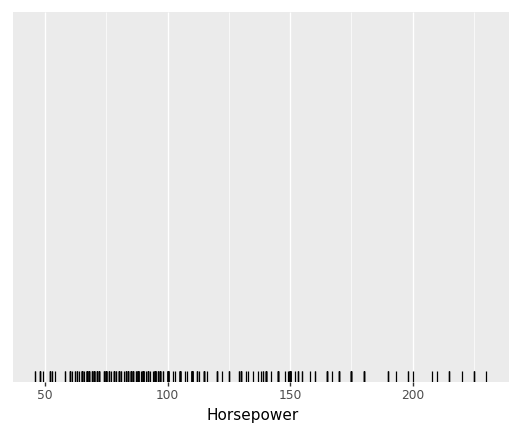

<ggplot: (8754044180537)>

In [61]:
ggplot(cars, aes(x="Horsepower")) + geom_rug()

To add other variables to the chart, we can just add new encodings. However, for a single chart we are always restricted to a single mark type.

In [62]:
alt.Chart(cars).mark_point().encode(x="Horsepower", y="Weight_in_lbs")

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [63]:
alt.Chart(cars).mark_circle().encode(x="Horsepower", y="Weight_in_lbs", color="Origin")

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### Data types
Altair understands four different variable data types

1. nominal
1. ordinal
1. quantitative
1. temporal

It will intelligently infer the data types of the variables from the pandas data frame and use appropriate scales for mapping the variables on visual channels. However, there are times when the data types are not correctly inferred. Either because we want to use different types or because the information is not yet available. We can then use shorthand notation, suffixing the variable with the first letter of the data type, or pass the type explicitly to the constructor of the respective channel class.    

In [64]:
alt.Chart(cars).mark_circle().encode(
    x="Horsepower:Q", y="Weight_in_lbs:Q", color="Origin:N"
)

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [65]:
alt.Chart(cars).mark_circle().encode(
    x=alt.X("Horsepower", type="quantitative"),
    y=alt.Y("Weight_in_lbs", type="quantitative"),
    color=alt.Color("Origin", type="nominal"),
)

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


## Transformations
Because Altair is embedded in Python, we can transform data using pandas and other libraries in any way we like. However, it can be convenient or sometimes even necessary to make data transformations part of the chart specification. 

### Aggregation

In [66]:
alt.Chart(cars).mark_line().encode(x="Horsepower", y="mean(Weight_in_lbs)")

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [67]:
alt.Chart(cars).mark_bar().encode(x="Horsepower", y="count(Horsepower)")

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In cases where the variable to be transformed is unambiguous, it is enough to only specify the transformation.

In [68]:
alt.Chart(cars).mark_bar().encode(x="Horsepower", y="count()")

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### Binning

Now to make a histogram, we simply need to *bin* the variable on the x-axis. To do this we need to use the more verbose `alt.X` class, which allows us to pass more configuration parameters. It is a common pattern in Altair to go from the shorthands to more flexible classes, when the shorthand defaults are insufficient.  

In [69]:
alt.Chart(cars).mark_bar().encode(x=alt.X("Horsepower", bin=True), y="count()")

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [70]:
(
    alt.Chart(cars)
    .mark_circle()
    .encode(
        x=alt.X("Horsepower", bin=True),
        y=alt.Y("Weight_in_lbs", bin=True),
        size="count()",
    )
)

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


There are a whole lot of other useful transformations, that you can apply to your data. Have a look here https://altair-viz.github.io/user_guide/transform.html#user-guide-aggregate-transform.

## An algebra for combining views
ggplot is by a default a layered grammar, which provides a facet function to construct trellis plots based on data variables.
In contrast Vega-Lite provides operators to combine unit plots in arbitrary ways by using layering, vertical and horizontal concatenation. It also provides higher level operators for faceting and repetition.  

### Layering
Charts can be layered on top of each other by using the `+` operator, which forwards the arguments to `alt.layer`.

In [71]:
chart1 = alt.Chart(cars).mark_point().encode(x="Horsepower", y="Weight_in_lbs")
chart2 = (
    alt.Chart(cars)
    .mark_line(color="red")
    .encode(x="Horsepower", y="mean(Weight_in_lbs)")
)
chart1 + chart2

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In contrast to ggplot, this seems very verbose. We can factor out common elements of the two charts into a base chart.

In [72]:
base = alt.Chart(cars).encode(x="Horsepower")
chart1 = base.mark_point().encode(y="Weight_in_lbs")
chart2 = base.mark_line(color="red").encode(y="mean(Weight_in_lbs)")
chart1 + chart2

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### Concatenation
We can concatenate charts either vertically or horizontally using the logical operators `|` and `&`.

In [73]:
hist1 = alt.Chart(cars).mark_bar().encode(x=alt.X("Horsepower", bin=True), y="count()")
hist2 = (
    alt.Chart(cars).mark_bar().encode(x=alt.X("Weight_in_lbs", bin=True), y="count()")
)
hist1 | hist2

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [74]:
hist1 & hist2

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [75]:
scatter = (
    alt.Chart(cars, width=860).mark_point().encode(x="Horsepower", y="Weight_in_lbs")
)
(hist1 | hist2) & scatter

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [76]:
(hist1 & hist2) | scatter

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### Repetition
Repeating charts allows us easily reuse chart specifications for a set of variables.

In [77]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y="count()",
).repeat(
    column=["Horsepower", "Weight_in_lbs", "Acceleration", "Displacement"]
)

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


By repeating over both rows and columns, we can easily create a scatterplot matrix. The grammar is so expressive that we do not require any high level operations for doing this.

In [78]:
alt.Chart(cars).mark_circle().encode(
    x=alt.X(alt.repeat("row"), type="quantitative"),
    y=alt.Y(alt.repeat("column"), type="quantitative"),
).repeat(row=["Horsepower", "Weight_in_lbs"], column=["Acceleration", "Displacement"])

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Because the Vega-Lite grammar is so modular, we can just use the same operations on a compound chart that we used on unit charts.

In [79]:
hist1 = (
    alt.Chart(cars)
    .mark_bar()
    .encode(x=alt.X(alt.repeat("row"), type="quantitative"), y="count()")
)
hist2 = (
    alt.Chart(cars)
    .mark_bar()
    .encode(x=alt.X(alt.repeat("column"), type="quantitative"), y="count()")
)
scatter = (
    alt.Chart(cars, width=860)
    .mark_point()
    .encode(
        x=alt.X(alt.repeat("row"), type="quantitative"),
        y=alt.Y(alt.repeat("column"), type="quantitative"),
    )
)
compound = (hist1 | hist2) & scatter

In [80]:
compound.repeat(
    row=["Horsepower", "Weight_in_lbs"], column=["Acceleration", "Displacement"]
)

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### Faceting
Faceting works as usual. We put a categorical variable on either `column` or `row` and the one chart for each subset is created.

In [81]:
alt.Chart(cars).mark_circle().encode(
    x="Weight_in_lbs",
    y="Miles_per_Gallon",
).facet(
    column="Origin"
)

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


## The new dimensions of interactivity
The greatest innovation in Vega-Lite in contrast to traditional grammars of graphics, is that it adds elements for interactivity. This gives us a bunch of whole new dimensions to map our data on, so that we can better explore the relationships in our dataset. 

[Yi *et al.*](https://files.t-square.gatech.edu/access/content/attachment/d2bd0a94-b123-43e5-9f08-bf3545ec7bf1/TowardADeeperUnderstandingOfTheRoleofInteractionInInformationVisualization.pdf) provides a taxonomy of visual interaction techniques. We will go through this taxonomy and see how it can be instantiated in Altair. 

### Explore: show me something else
The simplest way to add interactivity to a chart is by simply calling `interactive()` on it. This enables zooming and panning. 

In [82]:
alt.Chart(cars).mark_circle().encode(
    x="Horsepower", 
    y="Weight_in_lbs", 
    color="Origin"
).interactive()

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### Select: mark something as interesting
A selection highlights points of interest. This is especially useful in combination with exploration interactions enabled.

In [83]:
selection = alt.selection_single()

alt.Chart(cars).mark_circle(size=50).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(selection, 'Origin', alt.value('lightgray'))
).properties(
    selection=selection
).interactive()

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### Abstract/Elaborate: show me more or less detail
Combining an overview and a detail view side by side is useful for discovering patters in the whole dataset and then immediately inspecting them in detail.

In [84]:
selectionx = alt.selection_interval(encodings=["x"])
selectiony = alt.selection_interval(encodings=["y"])

overview = (
    alt.Chart(cars, title="overview")
    .mark_circle(size=50)
    .encode(
        x="Horsepower:Q",
        y="Miles_per_Gallon:Q",
        color=alt.condition(selectionx & selectiony, "Origin", alt.value("lightgray")),
    )
    .add_selection(selectionx)
    .add_selection(selectiony)
)

detail = (
    alt.Chart(cars, title="detail")
    .mark_circle(size=100)
    .encode(
        x=alt.X("Horsepower:Q", scale=alt.Scale(domain=selectionx.ref())),
        y=alt.Y("Miles_per_Gallon:Q", scale=alt.Scale(domain=selectiony.ref())),
        color="Origin",
        tooltip="Name",
    )
)

overview | detail

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### Connect: show me related items
Highlighting related items can be done connecting identical items across view or by highlighting related items, e.g. groups, within the same view.

In [85]:
brush = alt.selection(type="interval")

alt.Chart(cars).mark_circle().encode(
    x=alt.X(alt.repeat("row"), type="quantitative"),
    y=alt.Y(alt.repeat("column"), type="quantitative"),
    color=alt.condition(brush, "Origin:N", alt.value("lightgray")),
).add_selection(
    brush
).repeat(
    row=["Horsepower", "Weight_in_lbs"], column=["Acceleration", "Displacement"]
)

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [86]:
selection = alt.selection_single(fields=["Origin"])

alt.Chart(cars).mark_circle(size=50).encode(
    x="Horsepower:Q",
    y="Miles_per_Gallon:Q",
    color=alt.condition(selection, "Origin", alt.value("lightgray")),
).properties(
    selection=selection
)

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### Filter: show me something conditionally
Filtering is a powerful technique, as it allows us to view arbitrary subsets of our data in a new context.

In [87]:
brush = alt.selection(type="interval")

points = (
    alt.Chart(cars)
    .mark_point()
    .encode(
        x="Horsepower:Q",
        y="Miles_per_Gallon:Q",
        color=alt.condition(brush, "Origin:N", alt.value("lightgray")),
    )
    .add_selection(brush)
)

bars = (
    alt.Chart(cars)
    .mark_bar()
    .encode(y="Origin:N", color="Origin:N", x="count(Origin):Q")
    .transform_filter(brush)
)

points & bars

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [88]:
brush = alt.selection(type="interval")

points = (
    alt.Chart()
    .mark_point()
    .encode(
        y="Miles_per_Gallon:Q",
        color=alt.condition(brush, "Origin:N", alt.value("lightgray")),
    )
    .add_selection(brush)
)

bars = (
    alt.Chart()
    .mark_bar()
    .encode(x="Origin:N", y="count(Origin):Q", color="Origin:N")
    .transform_filter(brush)
)

alt.hconcat(points, bars, data=cars)

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


For more interactive plots see https://altair-viz.github.io/user_guide/interactions.html

## Exporting charts to the web

In [89]:
alt.hconcat(points, bars, data=cars).save("plot.html")

# An interactive journey through data exploration with Voyager
Voyager is a user interface powered by Vega-Lite that enables rapid data exploration and chart specification. 
Voyager encourages breadth-first exploration, by showing univariate summaries first and then intelligently suggesting the addition of new variables based on effective visual encodings. It is the perfect tool to gain an overview over a new dataset, but is also useful for quickly answering more specific questions.

You can find a demo version with the cars dataset here https://vega.github.io/voyager2/.

Using the Voyager JupyterLab extension, we can use it directly from within Jupyter. We just have to export our data in the right JSON format. 


In [90]:
with open("cars.json", "w") as f:
    f.write(cars.to_json(orient="records"))

# Further Readings
Jake VanderPlas' full tutorial on Altair (https://youtu.be/ms29ZPUKxbU ). The tutorial notebooks can be found at https://github.com/altair-viz/altair-tutorial.

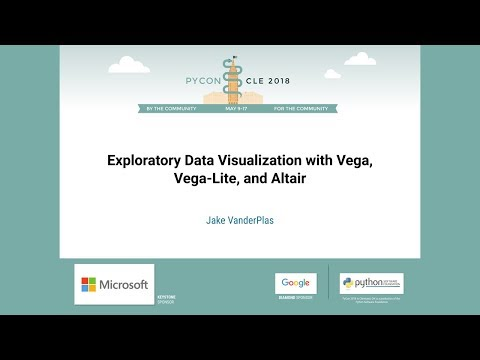

In [91]:
from IPython.display import YouTubeVideo

YouTubeVideo("ms29ZPUKxbU")

The conference talk about Voyage 2 (https://youtu.be/nrnN0l3rjdk ).

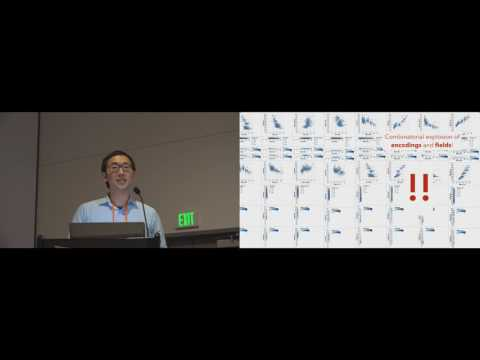

In [92]:
YouTubeVideo("nrnN0l3rjdk")

The original papers one Vega-Lite (https://idl.cs.washington.edu/papers/vega-lite/) and Voyager version 1 (https://idl.cs.washington.edu/papers/voyager/) and 2 (https://idl.cs.washington.edu/papers/voyager2/) that highlight the thoughts behind the design of these tools. 